# Entrenamiento de Redes Neuronales por lotes

Dependencies:
* Torch

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [2]:
# Definición de algunas variables
n_classes     = 4
batch_size    = 100
number_epochs = 100

In [3]:
# Creamos el dataset
x, y = make_blobs(n_samples=4000, centers=n_classes, cluster_std=2.20, random_state=0)
n_samples, input_dim = x.shape

### Creación de los cargadores de datos

Los cargadores de datos de Pytorch son elementos sobre los que se itera. Más información: https://pytorch.org/docs/stable/data.html

In [4]:
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

torch_dataset = Data.TensorDataset(x, y)
train_set, val_set = torch.utils.data.random_split(torch_dataset, [3000, 1000])

train_loader = Data.DataLoader(
    dataset=train_set,      # torch TensorDataset
    batch_size=batch_size,      # Tamaño del batch
    shuffle=True,               # Shuffle?
    num_workers=2,              # Número de workers
)
val_loader = Data.DataLoader(
    dataset=val_set,      # torch TensorDataset
    batch_size=batch_size,      # Tamaño del batch
    shuffle=False,               # Shuffle?
    num_workers=2,              # Número de workers
)

### Creación del modelo

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [6]:
net = Net(n_feature=input_dim, n_hidden=100, n_output=n_classes)     # define the network
print(net)

optimizer = torch.optim.Adam(net.parameters())
loss_func = torch.nn.CrossEntropyLoss()

Net(
  (hidden): Linear(in_features=2, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=4, bias=True)
)


### ¿Cómo se itera sobre los datos?
Para iterar sobre los datos símplmente metemos el cargador en un for.

In [7]:
for epoch in range(3):   # número de epochs
    for step, (batch_x, batch_y) in enumerate(train_loader):  # iteramos sobre todos los datos en batch size
        print('Epoch: ', epoch, '| Step: ', step, '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch y:  [3 2 2 0 0 0 3 1 0 3 2 0 1 0 2 1 3 1 1 1 2 2 3 2 3 0 0 1 3 0 1 0 0 2 3 1 1
 1 1 0 1 0 1 1 2 2 3 2 2 1 3 0 2 3 1 1 0 1 3 3 1 3 1 1 2 2 2 1 1 2 1 0 0 1
 1 3 3 1 1 3 3 1 3 2 2 3 1 2 1 1 0 1 1 1 1 3 1 2 0 3]
Epoch:  0 | Step:  1 | batch y:  [3 3 3 1 0 3 2 2 0 2 3 2 3 2 2 0 1 3 2 2 2 1 2 1 2 2 0 2 1 2 1 3 3 2 2 2 2
 3 3 1 0 0 0 3 3 1 2 3 3 1 2 2 1 3 1 3 3 3 2 2 3 0 2 3 3 2 3 2 1 0 2 0 3 2
 2 3 3 3 3 1 3 0 1 2 0 2 2 3 3 2 1 2 2 3 1 2 3 1 3 1]
Epoch:  0 | Step:  2 | batch y:  [3 3 1 2 3 0 0 2 0 1 3 3 2 0 3 1 3 2 0 1 1 0 0 2 3 3 3 3 1 3 1 3 2 0 1 0 0
 3 3 1 0 2 1 0 1 0 2 1 3 2 2 3 3 1 2 2 3 0 2 2 3 1 2 1 3 0 0 2 0 2 1 3 1 1
 0 1 0 1 2 3 1 0 0 3 1 1 0 3 1 1 2 2 2 2 3 0 1 3 3 3]
Epoch:  0 | Step:  3 | batch y:  [0 0 2 3 2 3 3 2 3 1 3 0 1 2 0 0 1 3 2 3 3 1 3 1 0 2 1 1 3 3 1 3 3 1 3 3 2
 0 0 0 2 3 3 1 2 2 1 2 0 3 3 1 0 1 1 1 0 2 0 3 1 0 0 3 1 2 0 0 3 0 1 3 3 0
 2 1 1 3 2 0 0 0 0 3 2 3 1 1 1 1 0 2 2 1 1 1 3 3 1 3]
Epoch:  0 | Step:  4 | batch y:  [1 3 0 1 1 2 0 0 0 

### Entrenamiento de un modelo por lotes

/tmp/ipykernel_11819/3701318259.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


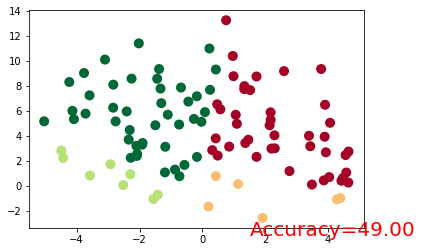

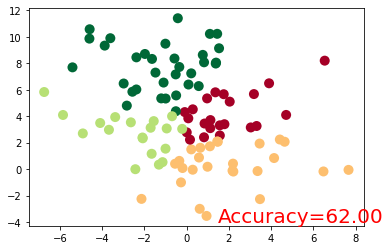

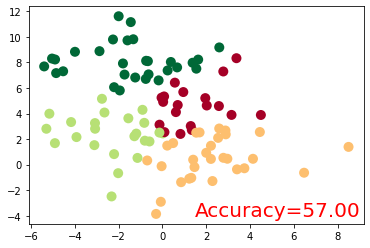

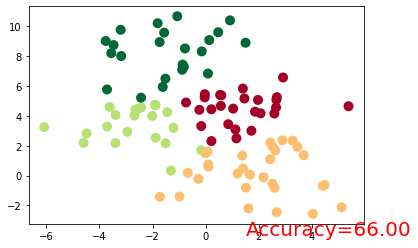

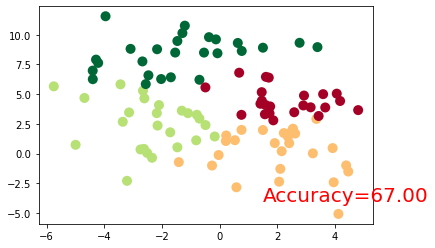

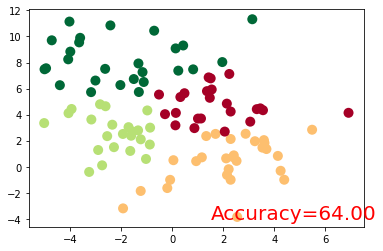

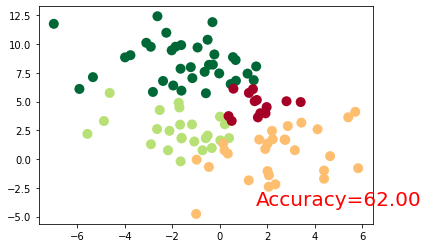

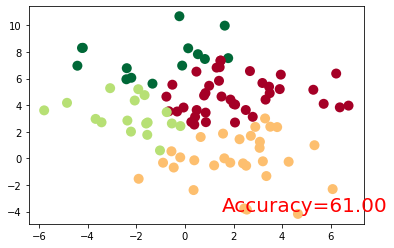

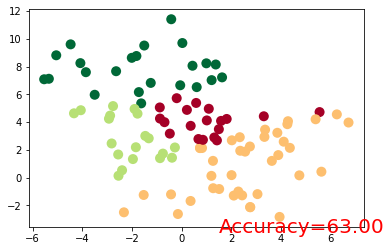

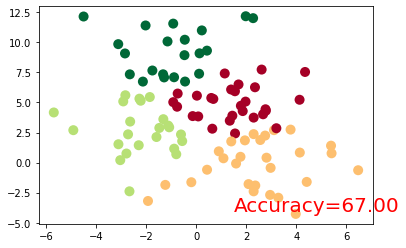

In [8]:
for t in range(number_epochs):
    for step, (batch_x, batch_y) in enumerate(train_loader):  # iteramos sobre todos los datos en batch size
        out = net(batch_x)
        loss = loss_func(out, batch_y)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = batch_y.data.numpy()
        plt.scatter(batch_x.data.numpy()[:, 0], batch_x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/len(pred_y)*100.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()